In [1]:
#Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Configuração para os gráficos
sns.set_theme(style='whitegrid')
print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


In [2]:
#Carregando o Dataset

df = pd.read_csv('marketing_campaign.csv', sep=';')

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [28]:
print('\n--- Estatísticas Descritivas (Numéricas) ---')
print(df.describe())


--- Estatísticas Descritivas (Numéricas) ---
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   


In [5]:
# Lidmpeza e Preparação dos Dados
# 1. Tratar valores nulos (missing values) em "Income"
# Calcular a mediana da renda
mediana_renda = df['Income'].median()

# Preencher os valores nulos (NaN) com a mediana
mediana_renda = df['Income'].fillna(mediana_renda)

print(f"Valores nulos em 'Income' preenchidos com a mediana: {mediana_renda}")

Valores nulos em 'Income' preenchidos com a mediana: 0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64


In [6]:
# 2. Engenharia de Features
# Obter o ano atual (vamos assumir 2025 para fins de cálculo, já que o dataset é de alguns anos atrás)
ano_atual = 2025

# Criando a coluna 'Age' (Idade)
df['Age'] = ano_atual - df['Year_Birth']

In [7]:
# Converter 'Dt_customer' para o formato de data
# Vou usar a data de hoje (ou uma data fixa de referência)
data_referencia = pd.to_datetime('2025-10-23')
df['Customer_Days'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [8]:
# Criando uma coluna 'Total_Children' (Total de Crianças/Adolescentes)
df['Total_Spent'] = df['Kidhome'] + df['Teenhome']

# Criando a coluna 'Total_Children' (Total de Crianças/Adolescentes)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

print("\nNovas colunas ('Age', 'Customer_Days', 'Total_Spent', 'Total_Children') criadas.")
print(df[['Age', 'Customer_Days', 'Total_Spent', 'Total_Children']].head())


Novas colunas ('Age', 'Customer_Days', 'Total_Spent', 'Total_Children') criadas.
   Age  Customer_Days  Total_Spent  Total_Children
0   68           1617            0               0
1   71             27            2               2
2   60            776            0               0
3   41             53            1               1
4   44            422            1               1


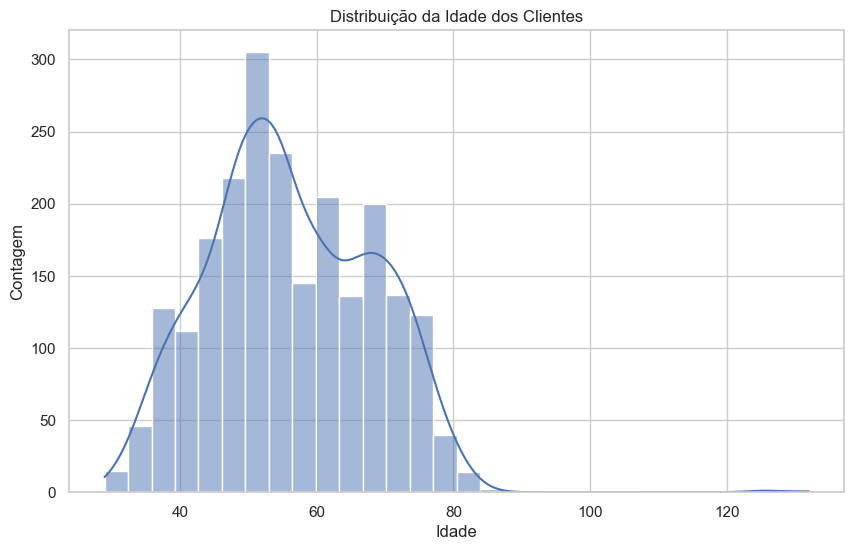

In [10]:
# 4. Análise Univariada (Analisando uma variável de cada vez)

# Vou criar gráficos para entender o perfil dos nossos clientes. 
# Quero ver a distribuição da Idade, Renda, Nível Educacional e Gasto Total.

# 4.1 Distribuição de Idade (Age)
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()



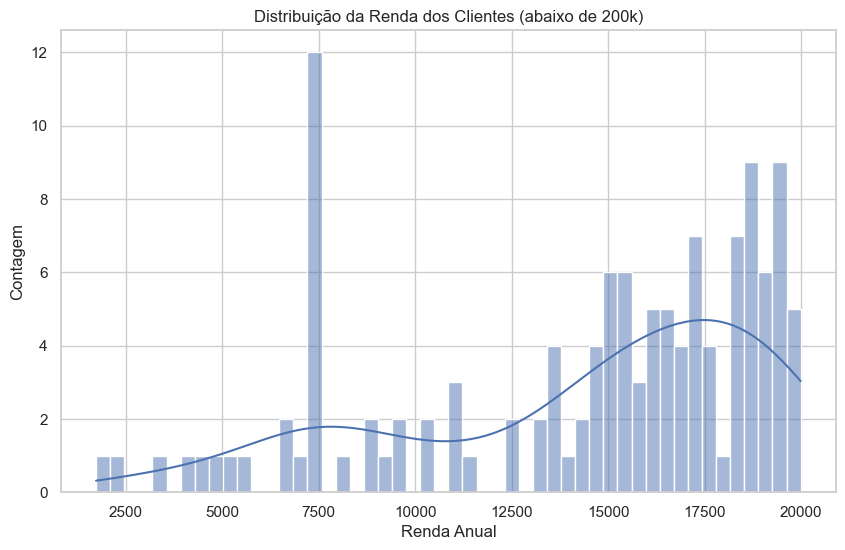

In [12]:
# 4.2 Distribuição de Renda (Income)
plt.figure(figsize=(10, 6))

# Vamos limitar a renda a 200.000 para melhor visualização, pois existem alguns outliers
sns.histplot(df[df['Income'] < 20000]['Income'], bins=50, kde=True)
plt.title('Distribuição da Renda dos Clientes (abaixo de 200k)')
plt.xlabel('Renda Anual')
plt.ylabel('Contagem')
plt.show()

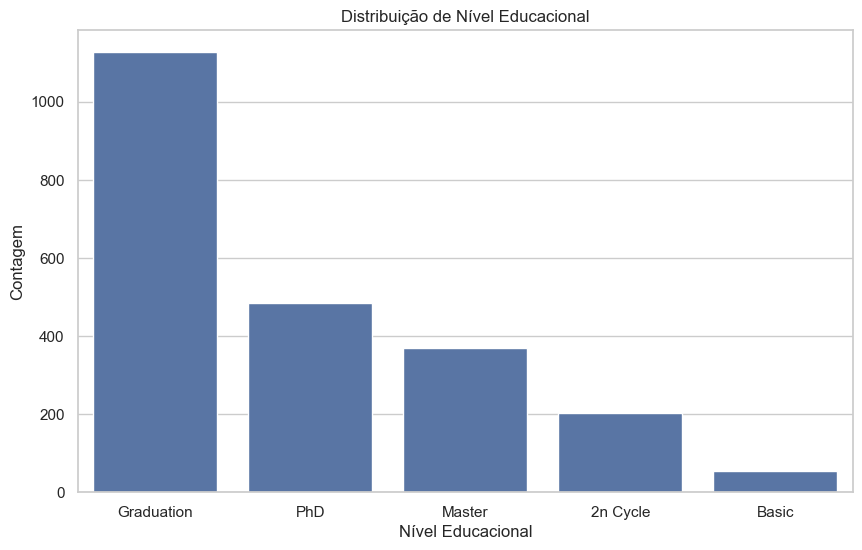

In [13]:
# 4.3 Distribuição de Nível Educacional (Education)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Distribuição de Nível Educacional')
plt.xlabel('Nível Educacional')
plt.ylabel('Contagem')
plt.show()

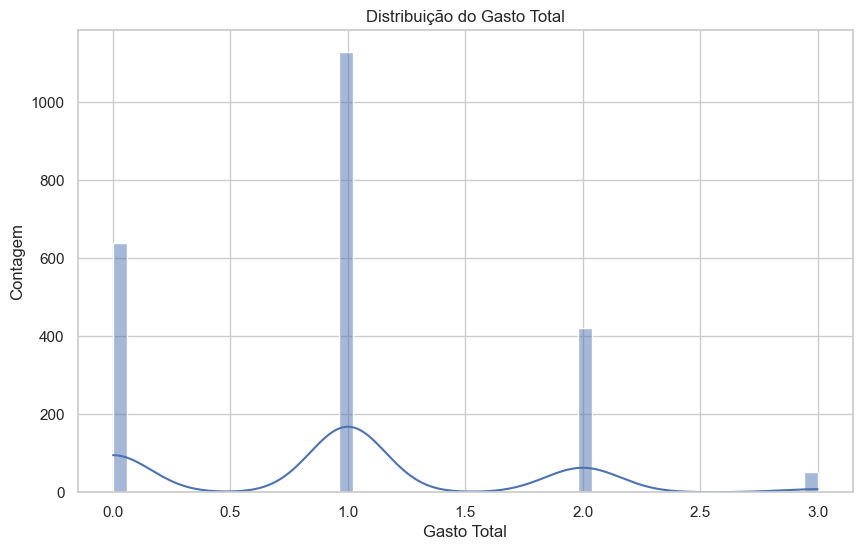

In [15]:
# 4.4 Perfil de Consumo
# Distribuição de Gasto Total (Total_Spent)
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Spent'], bins=50, kde=True)
plt.title('Distribuição do Gasto Total')
plt.xlabel('Gasto Total')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#Resumo:
#Idade: A maioria dos clientes tem entre 45 e 65 anos.
#Renda: A maior concentração de clientes tem uma renda anual entre 30.000 e 80.000.
#Educação: A maioria dos clientes possui Graduation (Licenciatura/Graduação), seguido de PhD (Doutoramento) e Master (Mestrado).

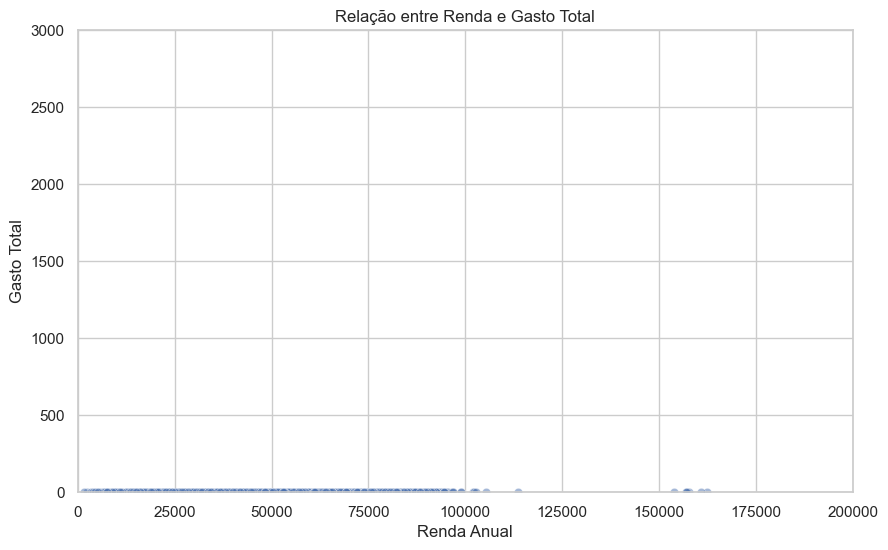

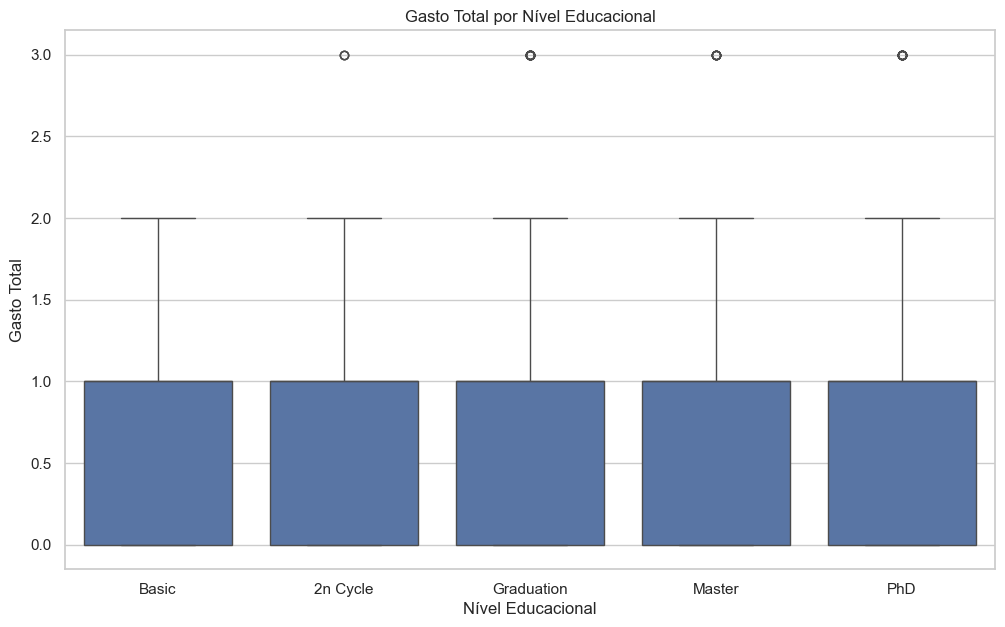

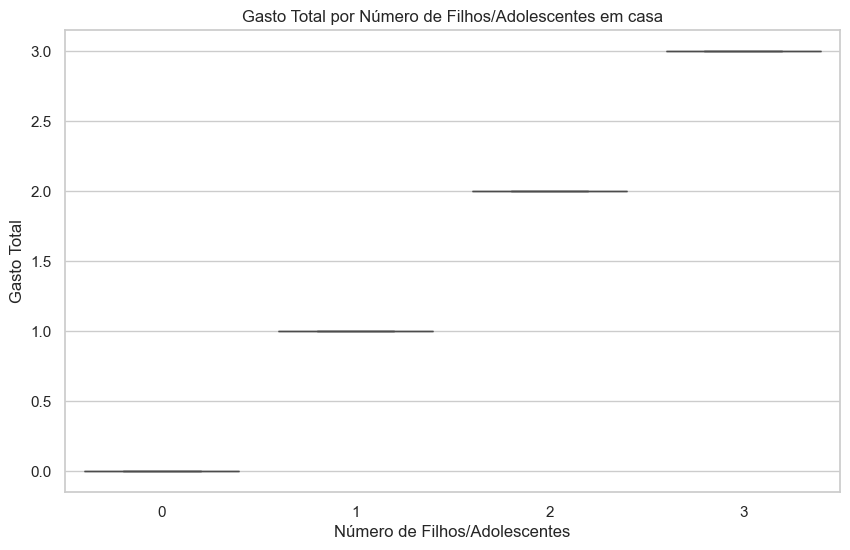

In [16]:
# 5. Análise Bivariada (Cruzando duas variáveis)
#Vou responder a perguntas de negócio cruzando variáveis.

#Pergunta 1: Pessoas com maior renda gastam mais?
#Pergunta 2: O nível educacional influencia o gasto total?
#Pergunta 3: Pessoas com filhos gastam menos?


# Pergunta 1: Renda (Income) vs. Gasto Total (Total_Spent)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spent', alpha=0.5)
plt.title('Relação entre Renda e Gasto Total')
plt.xlabel('Renda Anual')
plt.ylabel('Gasto Total')
plt.xlim(0, 200000) # Limitando o eixo X para melhor visualização
plt.ylim(0, 3000) # Limitando o eixo Y
plt.show()

# Pergunta 2: Nível Educacional (Education) vs. Gasto Total (Total_Spent)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Education', y='Total_Spent', 
            order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']) # Ordenando
plt.title('Gasto Total por Nível Educacional')
plt.xlabel('Nível Educacional')
plt.ylabel('Gasto Total')
plt.show()

# Pergunta 3: Número de Filhos (Total_Children) vs. Gasto Total (Total_Spent)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Children', y='Total_Spent')
plt.title('Gasto Total por Número de Filhos/Adolescentes em casa')
plt.xlabel('Número de Filhos/Adolescentes')
plt.ylabel('Gasto Total')
plt.show()


In [ ]:
#Resumo
#Renda vs. Gasto: Vemos uma clara tendência positiva. Quanto maior a renda, maior o gasto total.
#Educação vs. Gasto: A mediana do gasto total aumenta significativamente com o nível educacional. Clientes com PhD e Master gastam mais, em média, do que clientes com Graduation. Clientes com nível Basic são os que menos gastam.
#Filhos vs. Gasto: Clientes sem filhos (0) em casa têm uma mediana de gasto muito superior àqueles com 1, 2 ou 3 filhos/adolescentes.

In [ ]:
#Conclusões 
'''
Com esta análise, já podemos dar insights valiosos para a equipa de marketing:
Cliente Ideal: O cliente que mais gasta tende a ter uma renda mais alta, 
um nível educacional elevado (Mestrado ou Doutoramento) e, importantemente,
não ter filhos ou adolescentes a viver em casa.
    
Ação de Marketing: Campanhas de produtos de luxo (como vinhos caros, MntWines) devem ser focadas neste perfil de cliente. 
Campanhas para famílias com filhos podem precisar de focar mais em descontos ou produtos de menor valor.

FIM
'''